### A few initial libraries ###

In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ

from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo

In [2]:
qiskit.__qiskit_version__

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### Load device and the device configuration object ###

In [3]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q-ornl')
# device = FakeMumbai()

# backend_prop = device.properties()

In [4]:
from level3_context import _parse_transpile_args
from level3_context_pulse import level_3_context_pulse_pass_manager, level_3_pulse_pass_manager

In [5]:
#test circuit
t5 = QuantumCircuit(5, 5)
t5.h(0)

t5.barrier()
t5.ccx(0, 1, 2)
t5.cx(0, 3)
t5.ccx(0, 1, 2)

t5.barrier()

t5.ccx(0, 1, 2)
t5.cx(0, 1)
t5.ccx(0, 1, 2)

t5.barrier()

t5.ccx(0, 1, 2)
t5.cx(1, 2)
t5.ccx(0, 1, 2)

t5.barrier()

t5.ccx(0, 1, 2)
t5.cx(2, 3)
t5.ccx(0, 1, 2)

t5.barrier()

t5.ccx(0, 1, 2)
t5.cswap(1, 2, 3)
t5.ccx(0, 1, 2)

t5.barrier()

t5.ccx(0, 1, 2)
t5.cswap(2, 3, 4)
t5.ccx(0, 1, 2)

t5.barrier()



# t5.cx(0, 2)
# t5.ccx(0, 1, 2)
# t5.cx(1, 0)

# t5.barrier()

# t5.cx(1, 2)
# t5.ccx(0, 1, 2)
# t5.cx(0, 1)

# t5.barrier()

# t5.ccx(1, 2, 3)
# t5.x(2)
# t5.ccx(2, 3, 4)
# t5.h(3)
# t5.cx(3, 2)
# t5.h(4)
# t5.ccx(4, 3, 1)

t5.measure(list(range(5)), list(range(5)))

In [6]:
#test two intersection
t5 = QuantumCircuit(5, 5)
t5.h(0)

t5.barrier()
t5.ccx(0, 1, 3)
t5.cx(0, 3)
t5.ccx(0, 1, 2)

t5.barrier()
#in this example, the predecessor of the second ccx is cx, it will not identify the cancellation of two ccx
t5.ccx(0, 1, 3)
t5.cx(0, 1)
t5.ccx(0, 1, 2)

t5.barrier()

t5.ccx(0, 1, 2)
t5.cx(1, 2)
t5.ccx(0, 1, 3)

# t5.barrier()

# t5.ccx(0, 1, 2)
# t5.cx(2, 3)
# t5.ccx(0, 2, 3)

# t5.barrier()

# t5.ccx(0, 1, 2)
# t5.x(1)
# t5.ccx(0, 1, 3)

t5.barrier()

t5.ccx(0, 1, 2)
t5.ccx(0, 1, 3)

t5.barrier()

t5.ccx(0, 1, 2)
t5.ccx(0, 2, 3)

t5.barrier()

t5.ccx(0, 1, 2)
t5.ccx(3, 0, 2)

t5.barrier()



t5.measure(list(range(5)), list(range(5)))

In [7]:
#test three intersection
t5 = QuantumCircuit(5, 5)
t5.h(0)

t5.barrier()
t5.ccx(0, 1, 2)
t5.cx(0, 3)
t5.ccx(0, 1, 2)

t5.barrier()

t5.ccx(0, 1, 2)
t5.cx(0, 1)
t5.ccx(0, 1, 2)

t5.barrier()

t5.ccx(0, 1, 2)
t5.cx(1, 4)
t5.ccx(0, 1, 2)

t5.barrier()

t5.ccx(0, 1, 2)
t5.x(2)
t5.ccx(0, 1, 2)

# t5.barrier()

# t5.ccx(0, 1, 2)
# t5.cx(2, 3)
# t5.ccx(0, 2, 3)

# t5.barrier()

# t5.ccx(0, 1, 2)
# t5.x(1)
# t5.ccx(0, 1, 3)

t5.barrier()

t5.ccx(0, 1, 2)
t5.ccx(0, 1, 3)

t5.barrier()

t5.ccx(0, 1, 2)
t5.ccx(0, 2, 3)

t5.barrier()

t5.ccx(0, 1, 2)
t5.ccx(3, 0, 2)

t5.barrier()



t5.measure(list(range(5)), list(range(5)))

In [8]:
t5.draw()

┌───┐ ░                 ░                 ░                 ░           »
q_0: ┤ H ├─░───■────■────■───░───■────■────■───░───■─────────■───░───■───────»
     └───┘ ░   │    │    │   ░   │  ┌─┴─┐  │   ░   │         │   ░   │       »
q_1: ──────░───■────┼────■───░───■──┤ X ├──■───░───■────■────■───░───■───────»
           ░ ┌─┴─┐  │  ┌─┴─┐ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┴─┐  │  ┌─┴─┐ ░ ┌─┴─┐┌───┐»
q_2: ──────░─┤ X ├──┼──┤ X ├─░─┤ X ├─────┤ X ├─░─┤ X ├──┼──┤ X ├─░─┤ X ├┤ X ├»
           ░ └───┘┌─┴─┐└───┘ ░ └───┘     └───┘ ░ └───┘  │  └───┘ ░ └───┘└───┘»
q_3: ──────░──────┤ X ├──────░─────────────────░────────┼────────░───────────»
           ░      └───┘      ░                 ░      ┌─┴─┐      ░           »
q_4: ──────░─────────────────░─────────────────░──────┤ X ├──────░───────────»
           ░                 ░                 ░      └───┘      ░           »
c: 5/════════════════════════════════════════════════════════════════════════»
                                                                             »
«           ░            ░            ░            ░ ┌─┐            
«q_0: ──■───░───■────■───░───■────■───░───■────■───░─┤M├────────────
«       │   ░   │    │   ░   │    │   ░   │    │   ░ └╥┘┌─┐         
«q_1: ──■───░───■────■───░───■────┼───░───■────┼───░──╫─┤M├─────────
«     ┌─┴─┐ ░ ┌─┴─┐  │   ░ ┌─┴─┐  │   ░ ┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐      
«q_2: ┤ X ├─░─┤ X ├──┼───░─┤ X ├──■───░─┤ X ├┤ X ├─░──╫──╫─┤M├──────
«     └───┘ ░ └───┘┌─┴─┐ ░ └───┘┌─┴─┐ ░ └───┘└─┬─┘ ░  ║  ║ └╥┘┌─┐   
«q_3: ──────░──────┤ X ├─░──────┤ X ├─░────────■───░──╫──╫──╫─┤M├───
«           ░      └───┘ ░      └───┘ ░            ░  ║  ║  ║ └╥┘┌─┐
«q_4: ──────░────────────░────────────░────────────░──╫──╫──╫──╫─┤M├
«           ░            ░            ░            ░  ║  ║  ║  ║ └╥┘
«c: 5/════════════════════════════════════════════════╩══╩══╩══╩══╩═
«                                                     0  1  2  3  4

In [9]:
#backend = provider.get_backend('ibmq_mumbai')

In [10]:
backend = FakeTokyo()

backend_prop = backend.properties()

In [11]:
transpile_args = _parse_transpile_args([t5], backend, seed_transpiler = 0)

In [12]:
pass_manager_config = transpile_args[0]['pass_manager_config']

In [13]:
pm_context = level_3_pulse_pass_manager(pass_manager_config)

layout_method:  dense
routing method:  basic


In [14]:
t_circ = pm_context.run(t5)

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
Layout({
10: Qubit(QuantumRegister(5, 'q'), 3),
11: Qubit(QuantumRegister(5, 'q'), 0),
5: Qubit(QuantumRegister(5, 'q'), 1),
6: Qubit(QuantumRegister(5, 'q'), 2),
0: Qubit(QuantumRegister(5, 'q'), 4)
})
The arguments for the toffoli node are:  Qubit(QuantumRegister(20, 'q'), 11) Qubit(QuantumRegister(20, 'q'), 5) Qubit(QuantumRegister(20, 'q'), 6)
The distances between the toffoli qubits are:  1 between qubits 0 and 1
The distances between the toffoli qubits are:  1 between qubits 1 and 2
The distances between the toffoli qubits are:  1 between qubits 0 and 2
The physical qubits for the toffoli are:  11 5 6
The required toffoli will be decomposed using a 6 cnot decomposition
The arguments for the toffoli node are:  Qubit(QuantumRegister(20, 'q'), 11) Qubit(QuantumRegister(20, 'q'), 5) Qubit(QuantumRegister(20, 'q'), 6)
The distances between the toffoli qubits are:  1 between qubits 0 and 1
The distances between the toffoli qubits 

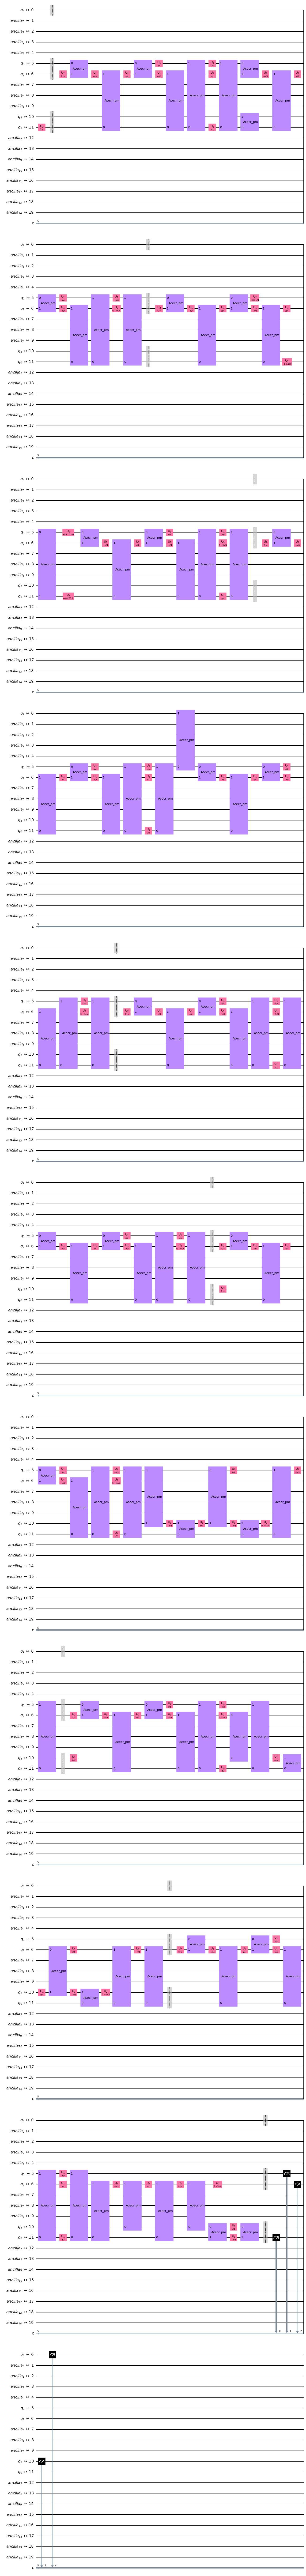

In [15]:
t_circ.draw(output = 'mpl')

In [16]:
t_circ.count_ops()

OrderedDict([('acecr_pm', 85),
             ('u1', 80),
             ('u2', 23),
             ('barrier', 8),
             ('measure', 5)])

In [17]:
t_circ.size()

193

In [18]:
t_circ.depth()

148

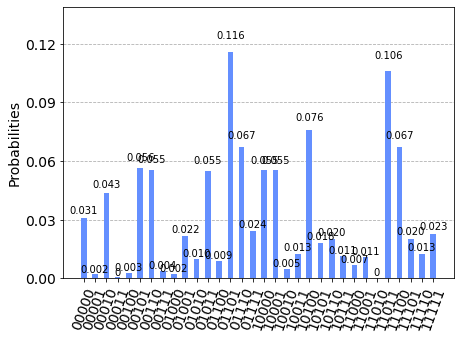

In [19]:
plot_histogram(execute(t_circ, backend = Aer.get_backend('qasm_simulator'), shots = 999999).result().get_counts())

In [20]:
pm_trios = level_3_pass_manager(pass_manager_config)

NameError: name 'level_3_pass_manager' is not defined

In [ ]:
t_trios_circ = pm_trios.run(t5)

In [ ]:
t_trios_circ.count_ops()

In [ ]:
t_trios_circ.draw(output = "mpl")

In [ ]:
t_trios_circ.size()

In [ ]:
t_trios_circ.depth()

In [ ]:
t_trios_circ.count_ops()

### Default compilation results ###

In [ ]:
from qiskit.compiler import transpile

t_circ_original = transpile(t5, backend = backend, optimization_level = 3, seed_transpiler = 0)

In [ ]:
t5.draw()

In [ ]:
t_circ_original.size()

In [ ]:
t_circ_original.depth()

In [ ]:
plot_histogram(execute(t_circ_original, backend = Aer.get_backend('qasm_simulator'), shots = 999999).result().get_counts())

In [ ]:
t_circ_original.count_ops()